Eli Chesnut and Kiersten Wener

In [2]:
import pandas as pd
import numpy as np

print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)

Pandas: 2.2.2
Numpy: 1.26.4


In [4]:
col_names = ('Age', 'Work Class', 'Fnlwgt', 'Education', 'Education Num', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country', 'Income')
df = pd.read_csv('adult.data', header = None, names = col_names)
df = df.drop(0)
df = df.reset_index(drop=True)
df.head()

,Age,Work Class,Fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
#replace the string income values with ints 0 and 1 
df.replace({'Income': {' >50K': 1, ' <=50K': 0}}, inplace=True)
#replace all missing values with nan to be able to find missing values more easilu 
df.replace(' ?', np.nan, inplace=True)
df.head()

/var/folders/yh/xxvfsj9560x_rd913kscw6t40000gn/T/ipykernel_47312/2695333918.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Income': {' >50K': 1, ' <=50K': 0}}, inplace=True)


,Age,Work Class,Fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Work Class      30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education Num   32560 non-null  int64 
 5   Marital Status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital Gain    32560 non-null  int64 
 11  Capital Loss    32560 non-null  int64 
 12  Hours Per Week  32560 non-null  int64 
 13  Native Country  31977 non-null  object
 14  Income          32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


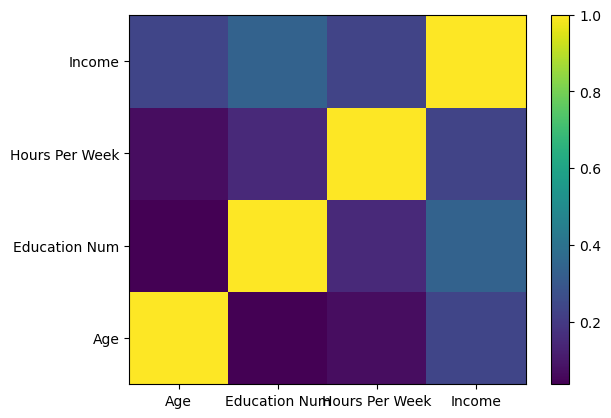

In [16]:
#import math and plots
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# import missingno as mn 

# mn.matrix(df.sort_values(by = ['Work Class', 'Occupation','Native Country']))

vars = ['Age','Education Num', 'Hours Per Week', 'Income']
corr_grid = df[vars].corr()
plt.pcolor(corr_grid)
plt.yticks(np.arange(0.5, len(vars), 1), vars)
plt.xticks(np.arange(0.5, len(vars), 1), vars)
plt.colorbar()
plt.show()